In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import database_credentials as dc

In [2]:
# Database credentials
postgres_user = dc.user()
postgres_pw = dc.pw()
postgres_host = dc.host()
postgres_port = dc.port()
postgres_db = dc.db()

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# no need for an open connection,
# as we're only doing a single query
engine.dispose()

In [5]:
# Creating a table with all accepted offers in the last 28 days
sql = '''
SELECT id, vin, order_id, guid, delivery_completed_at, status
FROM stms_db2_shipper.vehicles
WHERE delivery_completed_at >= current_timestamp at time zone 'utc' - interval '28 days'
and status IN ('delivered', 'invoiced', 'paid')
'''
shipper_vins = pd.read_sql_query(sql, con=engine)
shipper_vins

,id,vin,order_id,guid,delivery_completed_at,status
0,1658791,1D7HA16K15J646136,948288,84dbe64b-3b6e-4b66-bd65-3f20420d2a50,2020-12-04 15:37:08,delivered
1,1660972,KM8SMDHF7DU012962,949916,a51d2026-2d48-41d9-b6d6-01dd13191bd8,2020-12-17 17:05:52,delivered
2,1690048,WVWBP7AN2FE811821,971238,d324be05-e18a-4b10-8773-c9e1fbb55d33,2020-12-25 04:57:17,delivered
3,1693051,KM8JM12B55U086012,973490,c865c21d-a7a8-4cb3-a12c-7623d3755207,2020-12-29 03:07:06,delivered
4,1703914,1FTFW1E17JFD49736,980750,7b85a1ee-370f-46c9-b029-00040bebfaa5,2020-12-03 14:31:16,delivered
...,...,...,...,...,...,...
35245,1840314,5N1AR18U98C619760,1084227,6fa8dfe8-6aba-4e8d-8c47-4ccfac0435ed,2020-12-30 14:58:00,delivered
35246,1840683,2C3CDXHG8GH285374,1084596,ca434579-159b-4319-8a96-e04a1387439d,2020-12-30 15:52:24,delivered
35247,1840761,1B3HB28B87D269432,1084674,847d864c-e274-4f13-a442-1428e4279eb9,2020-12-30 15:22:42,delivered
35248,1840818,1GAHG39U731101937,1084731,7141f8a6-6c2d-41c0-844c-78a933429b1c,2020-12-30 15:03:08,delivered


In [6]:
shipper_vins.describe(include='all')

<ipython-input-6-7e8c29da9fda>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  shipper_vins.describe(include='all')


,id,vin,order_id,guid,delivery_completed_at,status
count,3.525000e+04,34703,3.525000e+04,35250,35250,35250
unique,NaN,34154,NaN,35250,28983,1
top,NaN,3FAFP31371R243778,NaN,454716f5-8361-4acb-8fcf-81d0417d9436,2020-12-03 23:01:29,delivered
freq,NaN,4,NaN,1,18,35250
first,NaN,NaN,NaN,NaN,2020-12-02 16:46:57,NaN
last,NaN,NaN,NaN,NaN,2020-12-30 16:20:43,NaN
mean,1.808748e+06,NaN,1.059050e+06,NaN,NaN,NaN
std,2.141109e+04,NaN,1.561163e+04,NaN,NaN,NaN
min,8.511000e+03,NaN,5.452000e+03,NaN,NaN,NaN
25%,1.797026e+06,NaN,1.050375e+06,NaN,NaN,NaN


In [7]:
sql = '''
SELECT id, shipper_id, delivery_completed_at, status
FROM stms_db2_shipper.orders
WHERE delivery_completed_at >= current_timestamp at time zone 'utc' - interval '28 days'
AND status IN ('delivered', 'invoiced', 'paid')
'''

shipper_orders = pd.read_sql_query(sql, con=engine)
shipper_orders

,id,shipper_id,delivery_completed_at,status
0,1013208,66,2020-12-24 18:47:29,invoiced
1,1028198,10,2020-12-10 17:42:47,delivered
2,1032398,19,2020-12-10 14:39:04,paid
3,1032878,10,2020-12-02 17:59:42,invoiced
4,1033038,87,2020-12-04 19:42:14,invoiced
...,...,...,...,...
29139,1083471,114,2020-12-30 14:44:18,paid
29140,1083790,78,2020-12-30 15:20:46,invoiced
29141,1084323,19,2020-12-30 15:12:35,delivered
29142,1084773,19,2020-12-30 16:10:18,delivered


In [8]:
# checking for missing values
shipper_orders.isna().sum()/shipper_orders.isna().count()

id                       0.0
shipper_id               0.0
delivery_completed_at    0.0
status                   0.0
dtype: float64

In [9]:
shipper_vins = shipper_vins.merge(shipper_orders, how='left', left_on='order_id', right_on='id',
                                              suffixes=('_VIN_table', '_orders_table'))
shipper_vins

,id_VIN_table,vin,order_id,guid,delivery_completed_at_VIN_table,status_VIN_table,id_orders_table,shipper_id,delivery_completed_at_orders_table,status_orders_table
0,1658791,1D7HA16K15J646136,948288,84dbe64b-3b6e-4b66-bd65-3f20420d2a50,2020-12-04 15:37:08,delivered,948288.0,10.0,2020-12-04 15:37:08,delivered
1,1660972,KM8SMDHF7DU012962,949916,a51d2026-2d48-41d9-b6d6-01dd13191bd8,2020-12-17 17:05:52,delivered,NaN,NaN,NaT,NaN
2,1690048,WVWBP7AN2FE811821,971238,d324be05-e18a-4b10-8773-c9e1fbb55d33,2020-12-25 04:57:17,delivered,971238.0,12.0,2020-12-25 04:57:17,invoiced
3,1693051,KM8JM12B55U086012,973490,c865c21d-a7a8-4cb3-a12c-7623d3755207,2020-12-29 03:07:06,delivered,NaN,NaN,NaT,NaN
4,1703914,1FTFW1E17JFD49736,980750,7b85a1ee-370f-46c9-b029-00040bebfaa5,2020-12-03 14:31:16,delivered,980750.0,78.0,2020-12-03 14:31:16,invoiced
...,...,...,...,...,...,...,...,...,...,...
35245,1840314,5N1AR18U98C619760,1084227,6fa8dfe8-6aba-4e8d-8c47-4ccfac0435ed,2020-12-30 14:58:00,delivered,1084227.0,19.0,2020-12-30 14:58:00,invoiced
35246,1840683,2C3CDXHG8GH285374,1084596,ca434579-159b-4319-8a96-e04a1387439d,2020-12-30 15:52:24,delivered,1084596.0,19.0,2020-12-30 15:52:24,delivered
35247,1840761,1B3HB28B87D269432,1084674,847d864c-e274-4f13-a442-1428e4279eb9,2020-12-30 15:22:42,delivered,1084674.0,19.0,2020-12-30 15:22:42,delivered
35248,1840818,1GAHG39U731101937,1084731,7141f8a6-6c2d-41c0-844c-78a933429b1c,2020-12-30 15:03:08,delivered,1084731.0,19.0,2020-12-30 15:03:08,delivered


In [11]:
# checking for missing values
shipper_vins.isna().sum()/shipper_vins.isna().count()

id_VIN_table                          0.000000
vin                                   0.015518
order_id                              0.000000
guid                                  0.000000
delivery_completed_at_VIN_table       0.000000
status_VIN_table                      0.000000
id_orders_table                       0.013390
shipper_id                            0.013390
delivery_completed_at_orders_table    0.013390
status_orders_table                   0.013390
dtype: float64

In [12]:
sql = '''
SELECT id, name, guid
FROM stms_db2_shipper.shippers
'''
shippers = pd.read_sql_query(sql, con=engine)
shippers

,id,name,guid
0,15,Polar Star Logistics Inc,8ed1b431-11e8-428a-af26-2764e7c6e93b
1,28,Test Broker prod,fbb5baca-972c-4084-a766-8009843ab194
2,34,Jay's Auto Transport Inc.,0b00d11a-a5f1-4788-8b4b-dd1334461117
3,38,The Appraisal Lane,55f0aeeb-9544-447a-83ca-33b0e6bd9bdd
4,54,ее,942df225-3aeb-4848-8616-efa17140fa8c
...,...,...,...
321,329,First Moto Transport LLC,e040c8ad-2a0e-41cd-b42e-cf07510f56dd
322,345,DES Transport LLC,75d67ab5-e1b3-4c30-87af-3e2ea22a6b61
323,90,CG Auto Logistics Inc,5a7ee9fc-8453-42bc-8497-24bbbaa1b089
324,114,ALGO LLC,dded6545-c09a-47f8-b5e1-fc5609aa5792


# Question
Can I match 'shipper_id' from orders table to 'id' from shippers table?

In [13]:
shipper_vins = shipper_vins.merge(shippers, how='left', left_on='shipper_id', right_on='id',
                                  suffixes=('_VIN_table', '_shippers_table'))
shipper_vins

,id_VIN_table,vin,order_id,guid_VIN_table,delivery_completed_at_VIN_table,status_VIN_table,id_orders_table,shipper_id,delivery_completed_at_orders_table,status_orders_table,id,name,guid_shippers_table
0,1658791,1D7HA16K15J646136,948288,84dbe64b-3b6e-4b66-bd65-3f20420d2a50,2020-12-04 15:37:08,delivered,948288.0,10.0,2020-12-04 15:37:08,delivered,10.0,BacklotCars Inc,d3c23063-4b42-4317-8df3-c373cde42695
1,1660972,KM8SMDHF7DU012962,949916,a51d2026-2d48-41d9-b6d6-01dd13191bd8,2020-12-17 17:05:52,delivered,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,1690048,WVWBP7AN2FE811821,971238,d324be05-e18a-4b10-8773-c9e1fbb55d33,2020-12-25 04:57:17,delivered,971238.0,12.0,2020-12-25 04:57:17,invoiced,12.0,TEST - Test Shipper,6bbb0b6a-10f2-4a65-8df6-05a52aecfa04
3,1693051,KM8JM12B55U086012,973490,c865c21d-a7a8-4cb3-a12c-7623d3755207,2020-12-29 03:07:06,delivered,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,1703914,1FTFW1E17JFD49736,980750,7b85a1ee-370f-46c9-b029-00040bebfaa5,2020-12-03 14:31:16,delivered,980750.0,78.0,2020-12-03 14:31:16,invoiced,78.0,CT Services,153a282b-d72c-47ea-9887-fcef203b30b6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35245,1840314,5N1AR18U98C619760,1084227,6fa8dfe8-6aba-4e8d-8c47-4ccfac0435ed,2020-12-30 14:58:00,delivered,1084227.0,19.0,2020-12-30 14:58:00,invoiced,19.0,RCG Logistics LLC,521addf3-df77-4f93-ac43-96769c67a56c
35246,1840683,2C3CDXHG8GH285374,1084596,ca434579-159b-4319-8a96-e04a1387439d,2020-12-30 15:52:24,delivered,1084596.0,19.0,2020-12-30 15:52:24,delivered,19.0,RCG Logistics LLC,521addf3-df77-4f93-ac43-96769c67a56c
35247,1840761,1B3HB28B87D269432,1084674,847d864c-e274-4f13-a442-1428e4279eb9,2020-12-30 15:22:42,delivered,1084674.0,19.0,2020-12-30 15:22:42,delivered,19.0,RCG Logistics LLC,521addf3-df77-4f93-ac43-96769c67a56c
35248,1840818,1GAHG39U731101937,1084731,7141f8a6-6c2d-41c0-844c-78a933429b1c,2020-12-30 15:03:08,delivered,1084731.0,19.0,2020-12-30 15:03:08,delivered,19.0,RCG Logistics LLC,521addf3-df77-4f93-ac43-96769c67a56c


In [14]:
# checking for missing values in every coloumn
shipper_vins.isna().sum()/shipper_vins.isna().count()

id_VIN_table                          0.000000
vin                                   0.015518
order_id                              0.000000
guid_VIN_table                        0.000000
delivery_completed_at_VIN_table       0.000000
status_VIN_table                      0.000000
id_orders_table                       0.013390
shipper_id                            0.013390
delivery_completed_at_orders_table    0.013390
status_orders_table                   0.013390
id                                    0.013390
name                                  0.013390
guid_shippers_table                   0.013390
dtype: float64

In [15]:
# dropping all missing values
shipper_vins.dropna(inplace=True)

In [16]:
shipper_vins.isna().sum()/shipper_vins.isna().count()

id_VIN_table                          0.0
vin                                   0.0
order_id                              0.0
guid_VIN_table                        0.0
delivery_completed_at_VIN_table       0.0
status_VIN_table                      0.0
id_orders_table                       0.0
shipper_id                            0.0
delivery_completed_at_orders_table    0.0
status_orders_table                   0.0
id                                    0.0
name                                  0.0
guid_shippers_table                   0.0
dtype: float64

In [17]:
# Truncating date and time to the day instead of seconds
shipper_vins['delivery_completed_at_VIN_table'] = pd.to_datetime(shipper_vins['delivery_completed_at_VIN_table']).dt.date

In [18]:
# Grouping the VIN table to get the unique number of days a shipper delivered a VIN in the last 28 days
result_1 = (shipper_vins.groupby(['name', 'guid_shippers_table', 'shipper_id'])
                         [['delivery_completed_at_VIN_table']].nunique())
result_1.reset_index(inplace=True)
result_1 = result_1.rename(columns={'delivery_completed_at_VIN_table': 'delivered_vins_28_days'})
result_1

,name,guid_shippers_table,shipper_id,delivered_vins_28_days
0,ABRS,f73c0255-a649-484f-a8e3-894a2c0c3ddf,151.0,26
1,ACME Car Shipping,8c75974f-beb0-45ab-9c9b-19a54eafa144,70.0,29
2,ALGO LLC,dded6545-c09a-47f8-b5e1-fc5609aa5792,114.0,29
3,AMERICA'S CHOICE AUTO TRANSPORT,4c61b8d8-524b-44fd-a14b-eed083c90d7d,323.0,1
4,AUTO TRANSPORT JUNCTION,54de36bb-2dd5-42bd-8853-12858138a8b4,100.0,19
...,...,...,...,...
59,TurnTime Transport,f6b8f5df-6bf1-47d8-b6f6-41175548ea4c,101.0,27
60,USHIP LOGISTICS LLC,9c48f0f1-850b-4ca3-8656-9def77e276a4,312.0,14
61,Unified Carrier Network LLC,4ed16f05-d0b0-408e-a685-44c300045e36,187.0,20
62,Webster Transport Inc,20fa55a0-1e94-4b76-9b43-fc27661e70a6,322.0,1


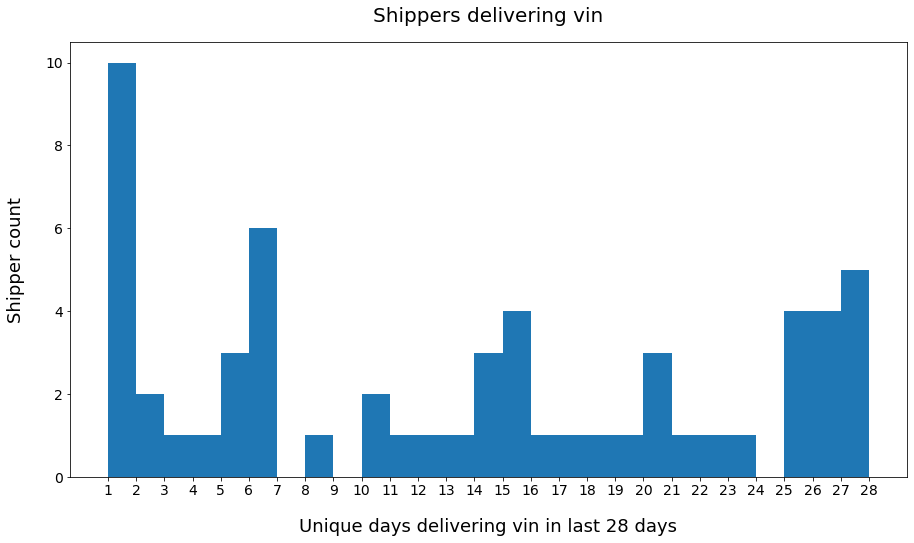

In [19]:
# histogram of unique days of delivered vins in last 28 days
plt.figure(figsize=(15,8))
plt.hist(result_1['delivered_vins_28_days'], bins=np.arange(1, 29))
plt.xticks(np.arange(1, 29), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Unique days delivering vin in last 28 days', fontsize=18, labelpad=20)
plt.ylabel('Shipper count', fontsize=18, labelpad=20)
plt.title('Shippers delivering vin', fontsize=20, pad=20)
plt.show()

In [ ]:
# output - shipper name, shipper_id, shipper_guid, # of days in past 28 shipper delivered a VIN